# Getting Started
In this tutorial, we will demonstrate the basics of using the **Copulas** library to generate a synthetic dataset.

In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.max_rows', 5)

## 1. Load the data
We'll start by loading a built-in dataset from the `copulas.datasets` module.

In [2]:
from copulas.datasets import load_three_dimensional
data = load_three_dimensional()
data

,x,y,z
0,0.000090,2.883992e-06,0.638689
1,0.881927,2.911979e-07,1.058121
...,...,...,...
998,1.000000,1.709259e-05,1.075514
999,0.991515,3.268451e-02,0.537514


We can visualize this dataset using a 3D scatter plot.

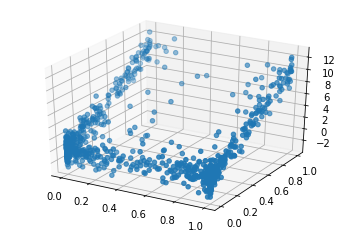

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["x"], data["y"], data["z"])
plt.show();

## 2. Create a Copula instance
Next, we need to import Copulas and create an instance of the `GaussianMultivariate` class with the default arguments. This will allow us to model this dataset using a Gaussian copula where the marginal distributions will be automatically estimated.

In [4]:
from copulas.multivariate import GaussianMultivariate
copula = GaussianMultivariate()

## 3. Fit the model
Once we have a `GaussianMultivariate` instance, we can call the `fit` method with `data`. This will estimate the marginal and joint distributions, allowing us to model the dataset.

In [5]:
copula.fit(data)

/Users/kevz/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


## 4. Sample new data
Once the model has been fitted, we are ready to generate new samples by calling the `sample` method of the `Copulas` instance and specifying the number of data points we want to sample.

In [6]:
num_samples = 1000
synthetic_data = copula.sample(num_samples)
synthetic_data

,x,y,z
0,9.993041e-01,0.065072,0.910047
1,4.793468e-10,0.012104,2.198326
...,...,...,...
998,3.200763e-06,0.071209,-2.237461
999,2.255701e-05,0.474139,1.822262


The returned object, `synthetic_data`, is a `pandas.DataFrame` containing a table of synthetic data with the same format as the input data and 1000 rows as we requested. We can plot the synthetic data and visually compare it to the real data.

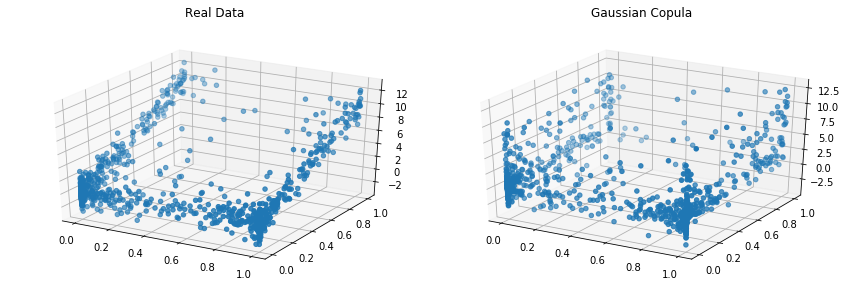

In [7]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data["x"], data["y"], data["z"])
ax.set_title("Real Data")
ax.title.set_position([.5, 1.05])

ax = fig.add_subplot(122, projection='3d')
ax.scatter(synthetic_data["x"], synthetic_data["y"], synthetic_data["z"])
ax.set_title("Gaussian Copula")
ax.title.set_position([.5, 1.05])

plt.tight_layout()
plt.show();

## 5. Load and save a model

For some copula models the fitting process can take a lot of time, so we probably would like to
avoid having to fit every we want to generate samples. Instead we can fit a model once, save it,
and load it every time we want to sample new data.

If we have a fitted model, we can save it by calling it's `save` method, that only takes
as argument the path where the model will be stored. Similarly, the `load` allows to load
a model stored on disk by passing as argument the path where the model is stored.

In [8]:
model_path = 'mymodel.pkl'
copula.save(model_path)

Once the model is saved, it can be loaded back as a **Copulas** instance by using the `load`
method. Note that you need to load it using the same class that was used to save it.

In [9]:
new_copula = GaussianMultivariate.load(model_path)

At this point we could use this model instance to generate more samples.

In [10]:
new_samples = new_copula.sample(num_samples)

## 6. Extract and set parameters
In some cases it's more useful to obtain the parameters from a fitted copula than to save and load from disk. Once our copula is fitted, we can extract it's parameters using the `to_dict` method:

In [11]:
copula_params = copula.to_dict()

This will return a dictionary containing all the copula parameters: Once we have all the parameters we can create a new identical **Copula** instance by using the method `from_dict`:

In [12]:
new_copula = GaussianMultivariate.from_dict(copula_params)

At this point we could use this model instance to generate more samples.

In [13]:
new_samples = new_copula.sample(num_samples)